# 1. Adding Libraries
## Data Manipulation and Analysis

This section of the project focuses on the data manipulation and analysis necessary for preparing the dataset for classification. The following libraries are utilized to handle data, visualize trends, and apply various machine learning models:

## Libraries Used

- **Pandas**: For data manipulation and analysis, enabling efficient handling of datasets.
- **NumPy**: To facilitate numerical operations and manage arrays.
- **Matplotlib & Seaborn**: For data visualization, allowing us to create informative plots to understand the data better.
- **YData Profiling**: For generating detailed reports that summarize the data, helping identify potential issues or insights.

## Machine Learning Models and Tools

A wide array of machine learning algorithms are implemented to classify weather types based on various features. The following models are explored:

1. **Logistic Regression**
   - **Description**: A linear model for binary classification that predicts the probability of an outcome based on independent variables.
   - **Use Case**: Effective for simple problems with a linear decision boundary.

2. **Decision Tree Classifier**
   - **Description**: A non-linear model that splits data into branches to make decisions based on feature values.
   - **Use Case**: Useful for both classification and regression tasks; interpretable and easy to visualize.

3. **Random Forest Classifier**
   - **Description**: An ensemble method that builds multiple decision trees and merges their outputs to improve accuracy.
   - **Use Case**: Reduces overfitting compared to a single decision tree and performs well on a variety of datasets.

4. **Gradient Boosting Classifier**
   - **Description**: Another ensemble technique that builds trees sequentially, with each new tree aiming to reduce the errors of the previous ones.
   - **Use Case**: Highly effective in improving predictive performance, especially in complex datasets.

5. **Support Vector Classifier (SVC)**
   - **Description**: A model that finds the optimal hyperplane to separate different classes in high-dimensional space.
   - **Use Case**: Performs well on both linear and non-linear data; effective in high-dimensional spaces.

6. **K-Neighbors Classifier**
   - **Description**: A non-parametric method that classifies data points based on the classes of their nearest neighbors.
   - **Use Case**: Simple and effective for smaller datasets but can be computationally expensive for large datasets.

7. **Naive Bayes Classifier**
   - **Description**: A probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions.
   - **Use Case**: Suitable for text classification and scenarios with a large number of features.

8. **XGBoost Classifier**
   - **Description**: An optimized gradient boosting library designed for speed and performance.
   - **Use Case**: Very effective for structured data; popular in machine learning competitions.

9. **LightGBM Classifier**
   - **Description**: A gradient boosting framework that uses tree-based learning algorithms and is designed for distributed and efficient training.
   - **Use Case**: Handles large datasets efficiently and can achieve high performance with less memory.

10. **CatBoost Classifier**
    - **Description**: A gradient boosting library that handles categorical features natively.
    - **Use Case**: Particularly useful when working with categorical data and requires less data preprocessing.

11. **Extra Trees Classifier**
    - **Description**: An ensemble method that uses multiple trees and introduces randomness in the selection of features and data points.
    - **Use Case**: Generally faster to train than Random Forest and can provide better performance in certain situations.

12. **AdaBoost Classifier**
    - **Description**: An ensemble method that combines multiple weak classifiers to create a strong classifier.
    - **Use Case**: Effective for binary classification tasks, especially when combined with decision trees.

13. **HistGradientBoosting Classifier**
    - **Description**: A faster version of gradient boosting that uses histogram-based algorithms.
    - **Use Case**: Efficient for large datasets and works well with high-dimensional data.

14. **Linear Discriminant Analysis (LDA) & Quadratic Discriminant Analysis (QDA)**
    - **Description**: Statistical classifiers that assume normal distribution of the data. LDA is linear, while QDA allows for quadratic boundaries.
    - **Use Case**: Useful for dimensionality reduction and classification in linearly separable data.




In [8]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
# Machine learning models and tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')  

# 2. Data CLeaning

The data cleaning phase is crucial for preparing the dataset for analysis and model training. This step involves loading the dataset, checking for missing values, handling duplicates, and ensuring that the data types are appropriate for the subsequent analysis. Proper data cleaning helps in enhancing the quality and reliability of the model's predictions


In [3]:
# Load the dataset
data = pd.read_csv("D:/kaggle_data/weather_data/weather_classification_data.csv")

# Display dataset information
print("Dataset Information:")
data.info()

# Summary statistics for object columns
print("\nSummary Statistics for Object Columns:")
print(data.describe(include=['object']))

# Clean column names by replacing spaces with underscores
data.columns = data.columns.str.replace(" ", "_")

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])  # Display only columns with missing values

# Data types of each column
data_types = data.dtypes
print("\nData Types of Each Column:")
print(data_types)

# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(data.head())

# Remove duplicates
data_cleaned = data.drop_duplicates()
print("\nData cleaned. Number of rows after removing duplicates:", data_cleaned.shape[0])

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB

Summary Statistics for Object Columns:
       Cloud Cover  Season Location Weather Type
count        13200   13200    13200        13200
unique 

## 3. Exploratory Data Analysis (EDA)
- Visualizations (histograms, scatter plots, box plots) for numerical features.
- Count plots for categorical features.
- Correlation analysis.
- Seasonal weather patterns analysis.

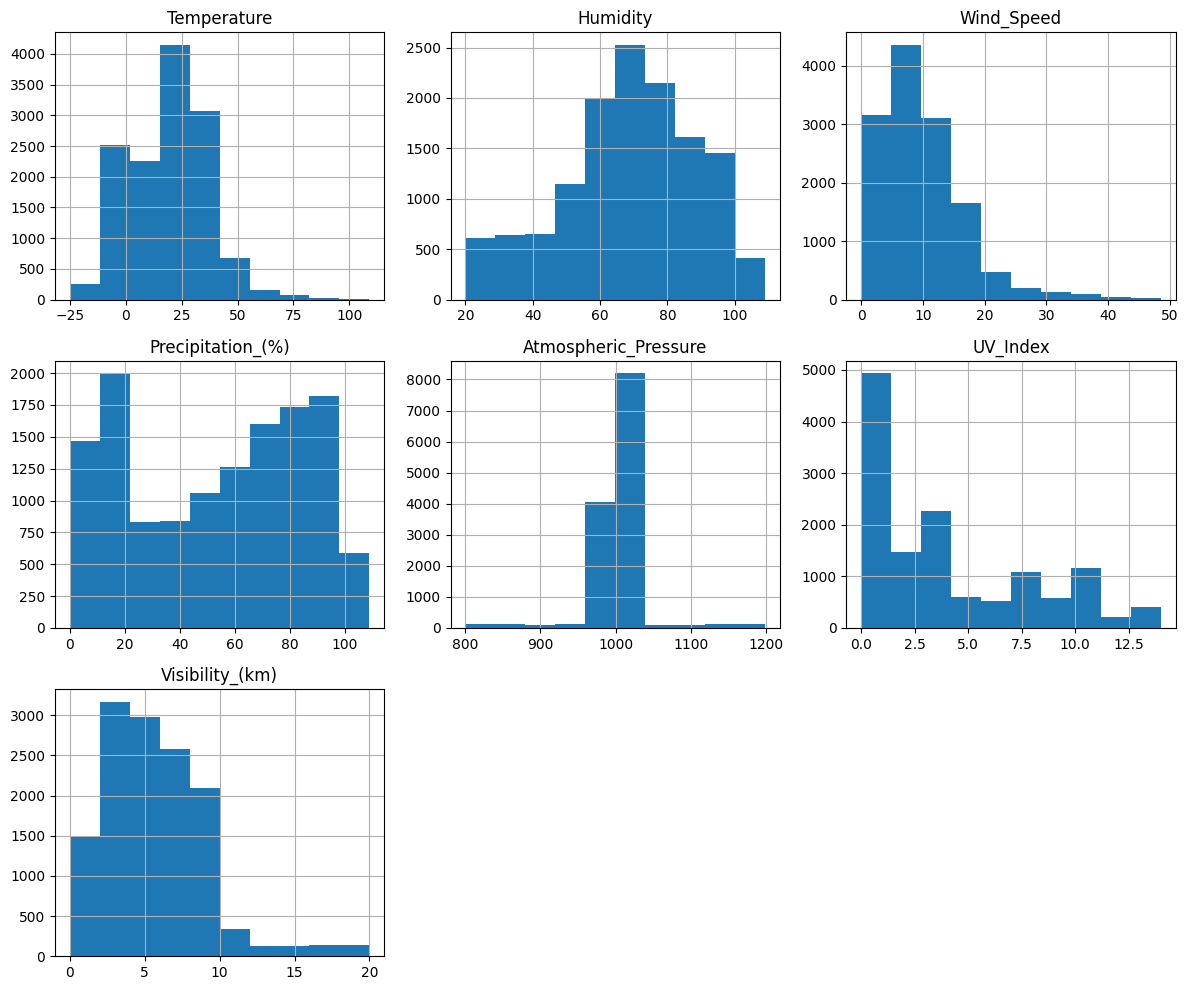

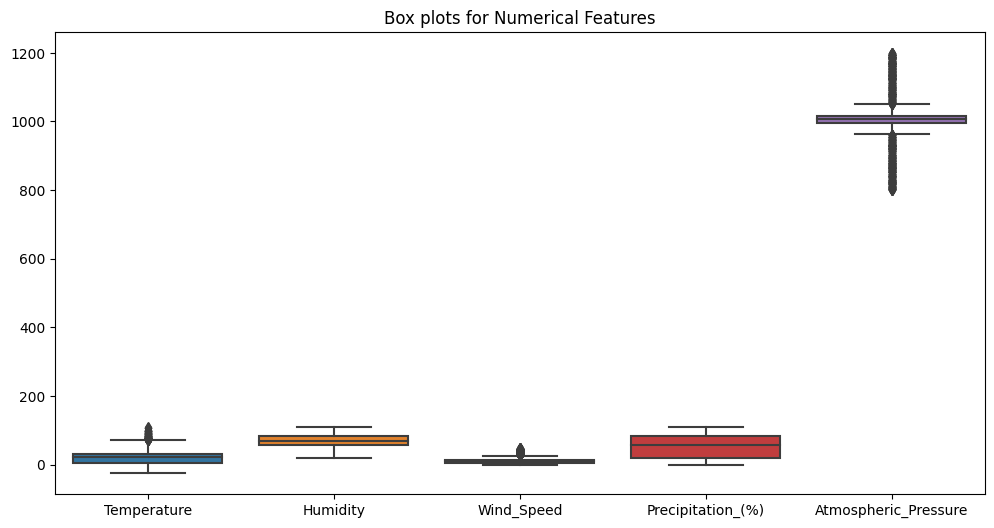

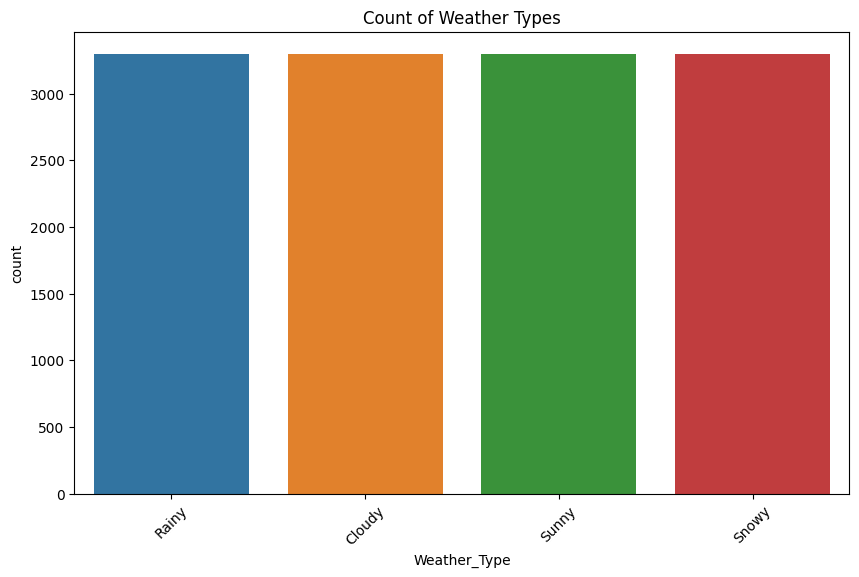

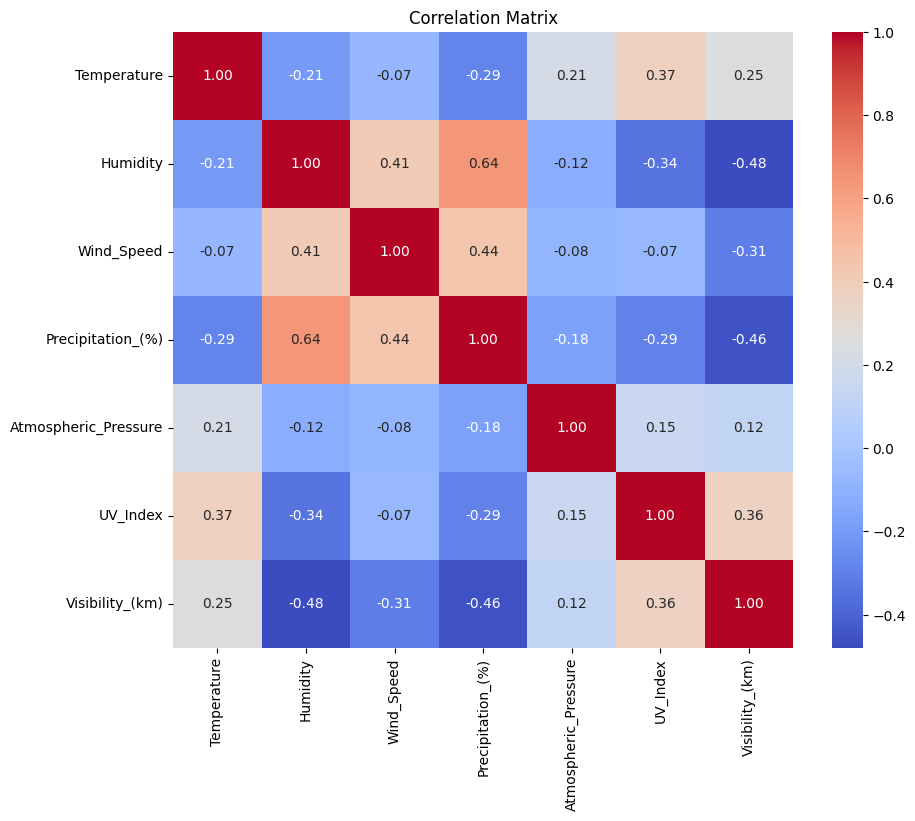

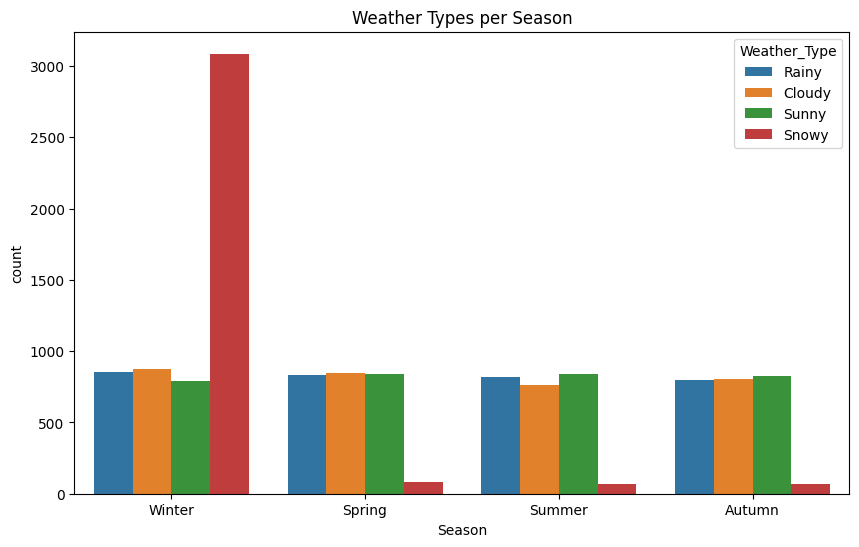

In [5]:

# Exploratory Data Analysis for Weather Classification Project


### Histograms for numerical features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Box plots for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation_(%)', 'Atmospheric_Pressure']])
plt.title('Box plots for Numerical Features')
plt.show()

### Count plots for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weather_Type')
plt.title('Count of Weather Types')
plt.xticks(rotation=45)
plt.show()

### Correlation matrix
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Seasonal Weather Patterns
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Season', hue='Weather_Type')
plt.title('Weather Types per Season')
plt.show()


## 4. Data Processing
- Feature engineering
- Scaling/normalization of numerical features.
- Splitting the dataset into training and testing sets.
  

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target variable
X = data.drop('Weather_Type', axis=1)
y = data['Weather_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical data columns
numeric_data = X.select_dtypes(include=['int', 'float']).columns.to_list()
categorical_data = X.select_dtypes(include=['object']).columns.to_list()

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_data:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_data] = scaler.fit_transform(X_train_scaled[numeric_data])
X_test_scaled[numeric_data] = scaler.transform(X_test_scaled[numeric_data])

print("Data processing completed. Training and testing sets are ready for modeling.")


Data processing completed. Training and testing sets are ready for modeling.


## 5. Machine Learning
- Model selection.
- Model training and evaluation.
- Hyperparameter tuning.
- Final model evaluation.

In [11]:
# Define classifiers to evaluate
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Histogram-based Gradient Boosting': HistGradientBoostingClassifier(random_state=42)
}

# Model training and evaluation
best_accuracy = 0
best_classifier_name = ""

for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    
    # Fit and evaluate the model using cross-validation
    scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5)
    mean_accuracy = scores.mean()
    print(f"{classifier_name} Cross-Validation Accuracy: {mean_accuracy:.4f}")

    # Fit the classifier on the training set
    classifier.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{classifier_name} Test Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print(f"\nClassification Report for {classifier_name}:")
    print(classification_report(y_test, y_pred))
    
    print("=" * 80)
    
    # Store the best classifier
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier_name = classifier_name

print(f"Best Classifier: {best_classifier_name} with accuracy {best_accuracy:.4f}")

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Final evaluation of the best Random Forest model
final_model_rf = grid_search_rf.best_estimator_
final_accuracy_rf = accuracy_score(y_test, final_model_rf.predict(X_test_scaled))
print(f"Final Random Forest Model Accuracy: {final_accuracy_rf:.4f}")

# Hyperparameter tuning for CatBoost
catboost_model = CatBoostClassifier(verbose=0)

param_grid_cb = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 1, 2]
}

grid_search_cb = GridSearchCV(catboost_model, param_grid_cb, cv=5, scoring='accuracy', verbose=1)
grid_search_cb.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("\nBest Hyperparameters for CatBoost:")
print(grid_search_cb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_cb.best_score_)

# Final evaluation of the best CatBoost model
best_catboost_model = grid_search_cb.best_estimator_
final_accuracy_cb = accuracy_score(y_test, best_catboost_model.predict(X_test_scaled))
print(f"Final CatBoost Model Accuracy: {final_accuracy_cb:.4f}")

Training Decision Tree...
Decision Tree Cross-Validation Accuracy: 0.9082
Decision Tree Test Accuracy: 0.9057

Classification Report for Decision Tree:
              precision    recall  f1-score   support

      Cloudy       0.87      0.88      0.88       651
       Rainy       0.90      0.89      0.89       647
       Snowy       0.93      0.94      0.94       701
       Sunny       0.92      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.90      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Training Random Forest...
Random Forest Cross-Validation Accuracy: 0.9165
Random Forest Test Accuracy: 0.9106

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Cloudy       0.87      0.90      0.88       651
       Rainy       0.91      0.91      0.91       647
       Snowy       0.93      0.94      0.94       701
       Sunny       0.93      0.90      0.91 

# Model Evaluation Results

In our evaluation of different classifiers, we found the following key results:

## Best Classifier
- **CatBoost** achieved an accuracy of **0.9133** with the following hyperparameters:
  - **Bagging Temperature**: 0
  - **Depth**: 8
  - **Iterations**: 200
  - **L2 Leaf Regularization**: 3
  - **Learning Rate**: 0.1
- **Cross-Validation Accuracy**: 0.9153

## Tuned Random Forest Model
- **Best Hyperparameters**:
  - **Max Depth**: None
  - **Min Samples Split**: 2
  - **Number of Estimators**: 50
- **Final Model Accuracy**: **0.9136**

### Decision Rationale
After careful consideration, I have decided to proceed with the **CatBoost model** for the following reasons:

1. **Feature Importance Analysis**: 
   - CatBoost provides a straightforward and reliable way to analyze feature importance, allowing for better insights into which features contribute most significantly to the model's predictions.

2. **Handling of Categorical Features**:
   - CatBoost is designed to handle categorical variables natively, reducing the need for extensive preprocessing and enabling more effective use of available data.

3. **Performance**:
   - Although the tuned Random Forest model showed slightly higher final accuracy, CatBoost demonstrated stronger cross-validation performance. This suggests that CatBoost may generalize better to unseen data.

4. **Robustness**:
   - CatBoost's architecture helps mitigate overfitting, making it a robust choice for diverse datasets. This can lead to more reliable predictions in real-world applications.

In conclusion, choosing **CatBoost** allows for enhanced interpretability through feature importance analysis while maintaining high performance, making it the preferred model for this project.


## 6. Feature Importance
- Extract Feature Importances
- Create a DataFrame for better visualization
- Sort the DataFrame by importance
- Print the feature importances
- Visualize importance using a bar plot


                Feature  Importance
0           Temperature   28.233235
6              UV_Index   14.598315
3     Precipitation_(%)   13.392858
8       Visibility_(km)    9.942695
5  Atmospheric_Pressure    8.774364
4           Cloud_Cover    8.479688
2            Wind_Speed    5.606985
1              Humidity    5.250328
7                Season    3.805899
9              Location    1.915632


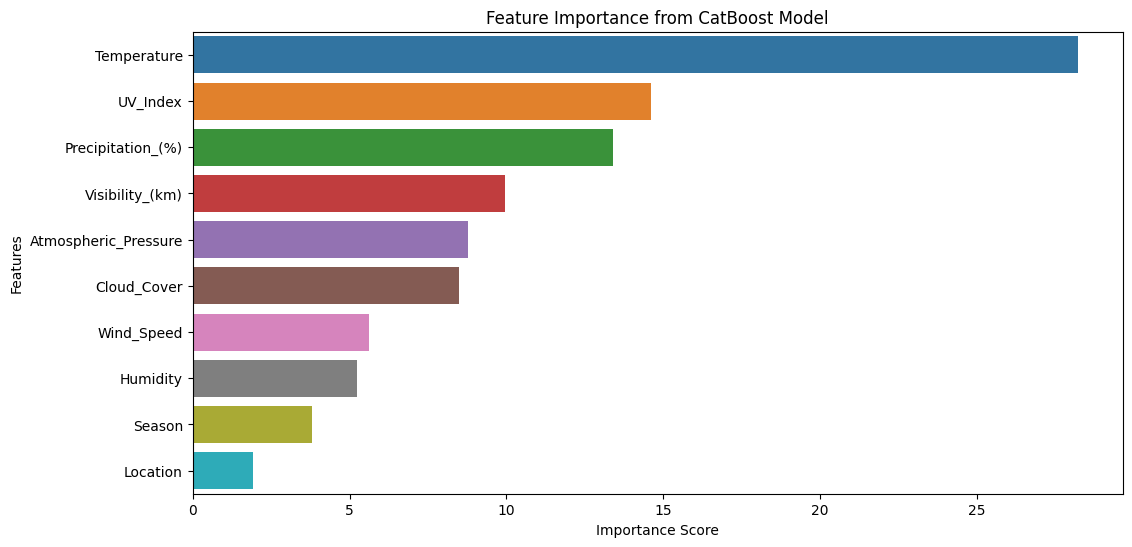

In [15]:
# After fitting the best CatBoost model
feature_importances = best_catboost_model.get_feature_importance()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or plot the feature importances
print(feature_importance_df)

#Visualize importance using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from CatBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


### Feature Importance Results
The feature importance analysis from the CatBoost model revealed the following key contributors to the predictions:

- **Temperature** emerged as the most influential feature, with an importance score of **28.23**, indicating its significant impact on weather classification.
- **UV Index** and **Precipitation (%)** also played important roles, with scores of **14.60** and **13.39**, respectively.
- Other notable features include **Visibility (km)**, **Atmospheric Pressure**, and **Cloud Cover**, suggesting that various environmental factors contribute to weather type predictions.
